*Import library's*

In [10]:
import numpy as np
import pandas as pd
from textblob import TextBlob as tb
import tweepy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob.classifiers import NaiveBayesClassifier
import os, re, nltk, string
from bs4 import BeautifulSoup
from collections import OrderedDict
from operator import itemgetter

*Twitter authentication*

In [11]:
consumer_key = 'Jg95VukOglg6RIqRrqt6GYRoa'
consumer_secret = 'ZvH3Oz7jFN0OvDMXGtRriTqOOykGnUgqxAU0wNKWhMElII0ivq'
access_token = '971179238396227584-KkOSGzCwhzv0lokz55Dkp1wTjyurnkW'
access_token_secret = 'y2NNUWU1tlhQYMOps49aSKgckRqTu7T7dPWpyNbMeXvAA'

In [12]:
def get_all_tweets(searchString, maxResult = 200):
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    new_tweets = api.search(searchString, count = maxResult)
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in new_tweets]
    return outtweets

*Get all tweets*

In [13]:
public_tweets = get_all_tweets('@falanext')
df = pd.DataFrame(public_tweets, columns=['id','created_at','text'])
df

,id,created_at,text
0,1060823778224160768,2018-11-09 09:17:52,b'@falanext Estou tentando falar com algu\xc3\...
1,1060815271592648705,2018-11-09 08:44:04,b'@DuDuZeRa1yt @Damianizando @itau @Bancointer...
2,1060755048412692482,2018-11-09 04:44:46,"b'@falanext @Bradesco Bom dia pessoal, porque ..."
3,1060732230333546496,2018-11-09 03:14:05,b'@falanext s\xc3\xb3 falta o dinheiro'
4,1060715716536614913,2018-11-09 02:08:28,b'@falanext @falanext aguardando respostas'
5,1060708897760178176,2018-11-09 01:41:22,"b'@falanext N\xc3\xa3o, j\xc3\xa1 pedi o cance..."
6,1060707182361108480,2018-11-09 01:34:33,b'To pensando em tornar o @falanext meu banco ...
7,1060693123725180928,2018-11-09 00:38:42,b'Abro o @falanext e ele me da 2 ingressos gr\...
8,1060691885637931008,2018-11-09 00:33:46,b'@falanext https://t.co/qcTQ6SDzFp'
9,1060690750097240064,2018-11-09 00:29:16,b'@falanext vcs esqueceram meu cart\xc3\xa3o e...


*Data Cleaning*

In [14]:
def cleanTweets(tweetsDF):
    table = str.maketrans(dict.fromkeys(string.punctuation.replace('@','')))
    # essa regex significa:
    # tudo que conter @ OU http OU terminador de linha seguido de uma palavra OU um espaco OU qualquer outro terminador
    # de linha.
    rePattern1 = '(@|http|\\n)(\w+|\s|\S)'
    formattedTweets = []
    for line in tweetsDF['text']:
        formattedStr = line.decode('utf-8').lower()
        formattedStr = formattedStr.translate(table)
        formattedStr = re.sub(rePattern1, "", formattedStr)  
        formattedTweets.append(formattedStr)
    return formattedTweets

formattedTweets = cleanTweets(df)
data = pd.DataFrame(formattedTweets, columns=['text'])
data

,text
0,estou tentando falar com alguém no chat desde...
1,o next nao concordo nao eles cobram taxa...
2,bom dia pessoal porque as minhas compras no ...
3,só falta o dinheiro
4,aguardando respostas
5,não já pedi o cancelamento não quero mais nad...
6,to pensando em tornar o meu banco principal a...
7,abro o e ele me da 2 ingressos grátis vou lev...
8,
9,vcs esqueceram meu cartão em churrasco


*Stopwords in portuguese*

In [15]:
stopwords = nltk.corpus.stopwords.words('portuguese')
# Inclusão de novas stopwords 
stopwords.append('tô')
stopwords.append('pra')
stopwords.append('pro')
stopwords.append('é')
stopwords.append('aí')
stopwords.append('ser')

*WordCloud*

(-0.5, 399.5, 199.5, -0.5)

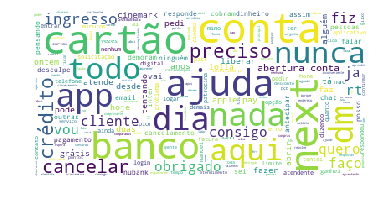

In [16]:
text = " ".join(tweet for tweet in data['text'])
wordcloud = WordCloud(max_font_size = 50, stopwords = stopwords, background_color = 'white').generate(text)
wordcloud.to_file("nouns_user.png")
plt.imshow(wordcloud)
plt.axis("off")

*Basic statistics about the data*

In [17]:
def word_count(str):
    counts = OrderedDict()
    words = str.split()
    for word in words:
        if word not in stopwords:
            if word in counts:
                counts[word] += 1
            else:
                counts[word] = 1
    return counts

print("There are {} words in the combination of all tweets.".format(len(text)))

counts = sorted(word_count(text).items(), key = itemgetter(1), reverse = True)
display(counts[:10])

There are 6881 words in the combination of all tweets.


[('conta', 16),
 ('cartão', 11),
 ('next', 11),
 ('ajuda', 9),
 ('banco', 8),
 ('app', 7),
 ('nada', 7),
 ('dm', 7),
 ('aqui', 6),
 ('preciso', 5)]

*Transform occurrences in a dataframe*

In [18]:
wordcount = pd.DataFrame(counts, columns=['word', 'counts'])
top10 = wordcount[:10]
top10

,word,counts
0,conta,16
1,cartão,11
2,next,11
3,ajuda,9
4,banco,8
5,app,7
6,nada,7
7,dm,7
8,aqui,6
9,preciso,5


*Top 10 most used words*

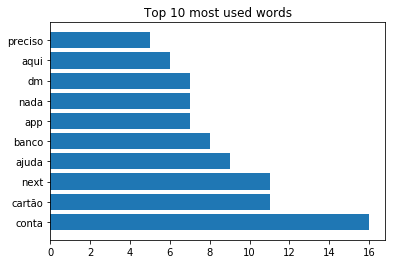

In [19]:
# Dataset
height = top10.counts
bars = top10.word
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)

# Create names on the y-axis
plt.yticks(y_pos, bars)

# Create title
plt.title('Top 10 most used words')
 
# Show graphic
plt.show()

*ReLi Lexicon - portuguese sentimental analysis*

In [34]:
base_path = '/Users/gayr/documents/gabriela/mba/tcc/ReLi-Lex'
allData = []
files = [os.path.join(base_path, f) for f in os.listdir(base_path)]
for file in files:
    t = 'pos' if '_Positivos' in file else 'neg'
    with open(file, 'r', encoding = 'latin-1') as content_file:
        content = content_file.read()
        all = re.findall('\[.*?\]',content)
        for w in all:
            allData.append((w[1:-1], t))
allDataDF = pd.DataFrame(allData, columns=['word', 'sentiment'])
allDataDF

,word,sentiment
0,aborrecente,neg
1,anacrônico,neg
2,arrombado,neg
3,besta,neg
4,bizarro,neg
5,bobo,neg
6,burro,neg
7,cansativo,neg
8,chato,neg
9,chocante,neg


*Validate the model and avoid overfit*

Functions

In [35]:
# Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# A random forest classifier
from sklearn.ensemble import RandomForestClassifier
# Encode labels with value between 0 and n_classes-1
from sklearn.preprocessing import LabelEncoder
# Accuracy classification score
from sklearn.metrics import accuracy_score
# This classifier is useful as a simple baseline to compare with other (real) classifiers
from sklearn.dummy import DummyClassifier

Original Variables

In [36]:
X_original = allDataDF.word
Y_original = allDataDF.sentiment

O Naive Bayes do sklearn precisa que as variáveis independentes sejam contínuas - por esse motivo precisaremos transformar palavras em números

In [37]:
le_x = LabelEncoder()
X_labelEncoded = le_x.fit_transform(X_original)
le_y = LabelEncoder()
Y_labelEncoded = le_y.fit_transform(Y_original)

O que faz o zip? Entender melhor...

In [38]:
zippedEncoded = list(zip(X_labelEncoded, Y_labelEncoded))
dfEncoded = pd.DataFrame(zippedEncoded, columns = ['word', 'sentiment'])

Cross Validation - Divisão da amostra entre treino e teste - scikitlearn

In [39]:
X_labelEncodedDF = dfEncoded.word
Y_labelEncodedDF = dfEncoded.sentiment
X_train, X_test, y_train, y_test = train_test_split(X_labelEncodedDF, Y_labelEncodedDF, test_size=0.30, random_state = 13)

Random Forest Classifier

In [40]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train.values.reshape(-1, 1), y_train)
y_pred = rf.predict(X_test.values.reshape(-1, 1))

Naive Bayes Classifier

In [41]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train.values.reshape(-1, 1), y_train)
y_nb_pred = rf.predict(X_test.values.reshape(-1, 1))

Dummy Model

In [42]:
dm = DummyClassifier()
dm.fit(X_train.values.reshape(-1, 1), y_train)
y_dummy_pred = dm.predict(X_test.values.reshape(-1, 1))

Acurácia dos modelos

In [43]:
print('Accuracy random forest on test dataset: {}'.format(round(accuracy_score(y_test, y_pred), 2)))
print('Accuracy naive bayes on test dataset: {}'.format(round(accuracy_score(y_test, y_nb_pred), 2)))
print('Accuracy dummy model on test dataset: {}'.format(round(accuracy_score(y_test, y_dummy_pred), 2)))

Accuracy random forest on test dataset: 0.7
Accuracy naive bayes on test dataset: 0.7
Accuracy dummy model on test dataset: 0.55


O nível de acurácia do Random Forest foi igual a Naive Bayes e melhor que o Dummy, por esse motivo iremos utilizar o Random Forest para a análise de sentimentos

In [47]:
# tweetsDataLabelEncoder = LabelEncoder()
tweet_text = data.text
tweetsEncoded = le_x.fit_transform(tweet_text)
y_pred_total = rf.predict(tweetsEncoded.reshape(-1, 1))
y_pred_total_decoded = le_y.inverse_transform(y_pred_total)
data['sentiment'] = y_pred_total_decoded
data

C:\Users\GAYR\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,text,sentiment
0,estou tentando falar com alguém no chat desde...,pos
1,o next nao concordo nao eles cobram taxa...,pos
2,bom dia pessoal porque as minhas compras no ...,pos
3,só falta o dinheiro,pos
4,aguardando respostas,pos
5,não já pedi o cancelamento não quero mais nad...,pos
6,to pensando em tornar o meu banco principal a...,pos
7,abro o e ele me da 2 ingressos grátis vou lev...,neg
8,,pos
9,vcs esqueceram meu cartão em churrasco,pos


*Counting positives and negatives*

In [48]:
df = data.groupby('sentiment').count()
df

,text
sentiment,
neg,26
pos,74


*Sentimental Analysis Graph based on Naive-Bayes Classification*

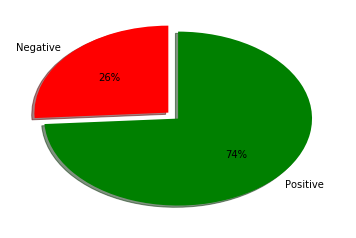

In [53]:
pie_pos = df.loc['pos']
pie_neg = df.loc['neg']

slices = [pie_neg, pie_pos]
tweets = ['Negative', 'Positive']
columns = ['Red', 'Green']
 
plt.pie(slices, labels = tweets, colors = columns, startangle = 90, shadow = True, explode = (0.1, 0), autopct='%1.0f%%')

plt.show()

*Positive WordCloud*

*Negative WordCloud*